In [1]:
%config IPCompleter.greedy=True


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_mouse_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID")

merged_mouse_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
#checking the number of data points for each mouse 

mouse_counts = pd.DataFrame(merged_mouse_df["Mouse ID"].value_counts())
mouse_counts.reset_index(inplace = True)
mouse_counts

,index,Mouse ID
0,g989,13
1,a275,10
2,x401,10
3,a644,10
4,w914,10
...,...,...
244,b447,1
245,o848,1
246,u153,1
247,d133,1


In [3]:
#removing any mice with dupe or incomplete data points

for i in range (len(mouse_counts)):
    if mouse_counts.iloc[i, 1] != 10:
        merged_mouse_df = merged_mouse_df.drop(merged_mouse_df.loc[merged_mouse_df["Mouse ID"] == mouse_counts.iloc[i, 0]].index)
        
        

In [4]:
#using groupby to get the summary stats for each drug by time period

grouped_drug = merged_mouse_df.groupby(["Drug Regimen", "Timepoint"])
sum_stats = grouped_drug["Tumor Volume (mm3)"].agg(["mean", "median", "std", "var", "sem"])

sum_stats.head()

mean     median       std        var       sem
Drug Regimen Timepoint                                                     
Capomulin    0          45.000000  45.000000  0.000000   0.000000  0.000000
             5          44.638812  45.622381  1.711731   2.930025  0.373530
             10         43.288693  43.421014  3.240531  10.501043  0.707142
             15         42.241369  42.283665  3.720418  13.841513  0.811862
             20         41.046149  40.716428  3.878850  15.045480  0.846435

In [5]:
#using groupby then getting a list of unique mouse ID for each drug, then getting length of list to determine the # of mice for each drug regimen


group_mouse_ID = merged_mouse_df.groupby("Drug Regimen")
group_mouse_ID = pd.DataFrame(group_mouse_ID["Mouse ID"].unique())


group_mouse_ID_Count = []

for i in range(len(group_mouse_ID)):
    group_mouse_ID_Count.append(len(group_mouse_ID.iloc[i,0]))

group_mouse_ID["Count of mice"] = group_mouse_ID_Count

group_mouse_ID.drop("Mouse ID", axis=1, inplace = True)


count_mice_per_drug = group_mouse_ID.reset_index()
count_mice_per_drug 



,Drug Regimen,Count of mice
0,Capomulin,21
1,Ceftamin,13
2,Infubinol,9
3,Ketapril,11
4,Naftisol,13
5,Placebo,11
6,Propriva,7
7,Ramicane,20
8,Stelasyn,11
9,Zoniferol,14


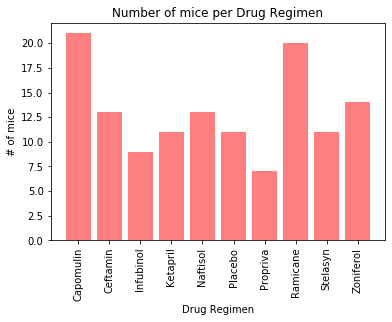

In [6]:
#creating bar chart using matplotlib


x_axis = np.arange(len(count_mice_per_drug))

plt.bar(x_axis, count_mice_per_drug["Count of mice"], align = "center", color ="r", alpha =.5)
tick_location =[value for value in x_axis]
plt.xticks(tick_location, count_mice_per_drug["Drug Regimen"], rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("# of mice")
plt.title ("Number of mice per Drug Regimen")

plt.show()

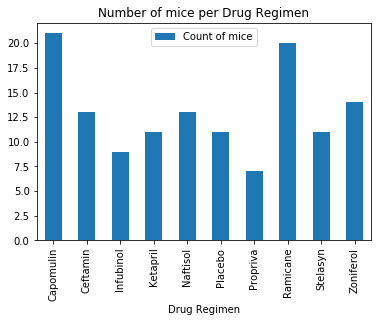

In [7]:
#creating bar chart using pandas

group_mouse_ID.plot(kind="bar")
plt.title("Number of mice per Drug Regimen")
plt.show()

In [8]:
#using groupby then getting a list of unique mouse ID for each drug, then getting length of list to determine the # of mice for gender


mouse_gender = merged_mouse_df.groupby("Sex")
mouse_gender = mouse_gender["Mouse ID"].unique()

gender_mouse_Count = []

for i in range(len(mouse_gender)):
    gender_mouse_Count.append(len(mouse_gender[i]))

    
mouse_gender = pd.DataFrame(mouse_gender)  
    
mouse_gender ["# of mice"]= gender_mouse_Count   
    
del mouse_gender["Mouse ID"]

mouse_gender.reset_index(inplace = True)

mouse_gender

,Sex,# of mice
0,Female,62
1,Male,68


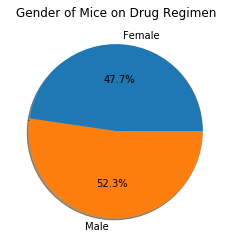

In [9]:
#creating pie chart using matplotlib

plt.pie(mouse_gender ["# of mice"], labels= mouse_gender.iloc[:, 0], autopct= "%1.1f%%", shadow = True )
plt.title("Gender of Mice on Drug Regimen")

plt.show()

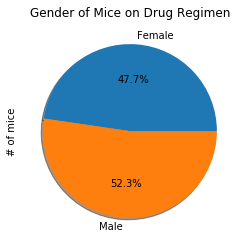

In [10]:
#creating pie chart using pandas

mouse_gender = mouse_gender.set_index("Sex")


mouse_gender.plot(kind = "pie",y="# of mice", autopct= "%1.1f%%", legend=None, shadow = True)

plt.title("Gender of Mice on Drug Regimen")

plt.show()

In [11]:
#loop through the list of regiments, filter the df for regiment, calculate upper and lower boundary and see if any mice with Tumor Volume out side of these ranges and if so store in a list



tumor_volume = merged_mouse_df.loc[merged_mouse_df["Timepoint"] == 45]


regimens = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]


outliers = []

data_for_chart = []

tumor_volume_drug = tumor_volume[0:0]


for drug in regimens:
    
    q1 = 0
    q2 = 0
    q3 = 0
    iqr = 0
    lower_bound = 0
    upper_bound = 0
    
    tumor_volume_drug = tumor_volume_drug[0:0]
    
    
    
    tumor_volume_drug = tumor_volume.loc [tumor_volume["Drug Regimen"] == drug]
    
    
    data_for_chart.append(tumor_volume_drug.iloc[:, 6].tolist())
    
    q1, q2, q3 = tumor_volume_drug["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q2 + (1.5*iqr)

    outliers_drug = []
    outliers_drug.clear()
    
    for i in range(len(tumor_volume_drug)):
        if tumor_volume_drug.iloc [i,6]> upper_bound or tumor_volume_drug.iloc [i,6]< lower_bound:
            outliers_drug.append(tumor_volume_drug.iloc [i,0])
    
    outliers.append(outliers_drug)

outliers

[[], [], [], []]

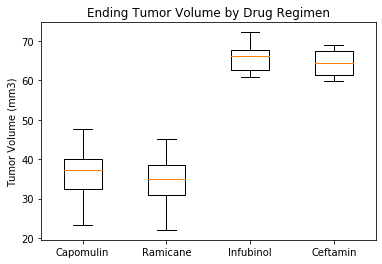

In [12]:
#creating 1) There is a strong positive correlation between mouse weight and tumor volume, given the p-value is below 0.01, we can conclude the correlation is statistically significant with 99% confidence interval 

2) looking at the box and whisker graph, mice that were on the Ramicane regimen have the smallest median tumor volume with lower dispersion in tumor volume among the mice 

3) Data points for many of the regimens were less then 15, this is quite a small sample size to draw statistically significant conclusions
 using matplotlib

fig1, ax1 = plt.subplots()
ax1.set_title("Ending Tumor Volume by Drug Regimen")
ax1.boxplot(data_for_chart)
plt.xticks([1,2,3,4],regimens)
plt.ylabel("Tumor Volume (mm3)")

plt.show()

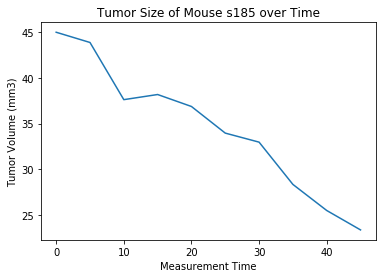

In [13]:
#creating line graph using matplotlib


plt.plot(merged_mouse_df.loc[(merged_mouse_df["Mouse ID"] == "s185"), "Timepoint"], 
         merged_mouse_df.loc[(merged_mouse_df["Mouse ID"] == "s185"), "Tumor Volume (mm3)"])

plt.xlabel("Measurement Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Size of Mouse s185 over Time")


plt.show()

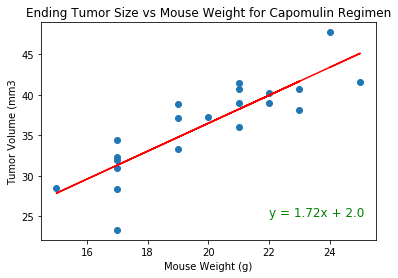

(0.8490719078173734, 1.1339296616720512e-06)


In [16]:



x_values = tumor_volume.loc[(tumor_volume["Drug Regimen"] == "Capomulin"), "Weight (g)"]
y_values = tumor_volume.loc[(tumor_volume["Drug Regimen"] == "Capomulin"), "Tumor Volume (mm3)"]


plt.scatter(x_values, y_values)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3")
plt.title("Ending Tumor Size vs Mouse Weight for Capomulin Regimen")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.plot(x_values, regress_values, "-r")
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(22,25),fontsize=12,color="green")

plt.show()


correlation_cofficent = st.pearsonr(x_values, y_values)

print(correlation)

Three observations:

1) There is a strong positive correlation between mouse weight and tumor volume, given the p-value is below 0.01, we can conclude the correlation is statistically significant with 99% confidence interval 

2) looking at the box and whisker graph, mice that were on the Ramicane regimen have the smallest median tumor volume with lower dispersion in tumor volume among the mice 

3) Data points for many of the regimens were less then 15, this is quite a small sample size to draw statistically significant conclusions
